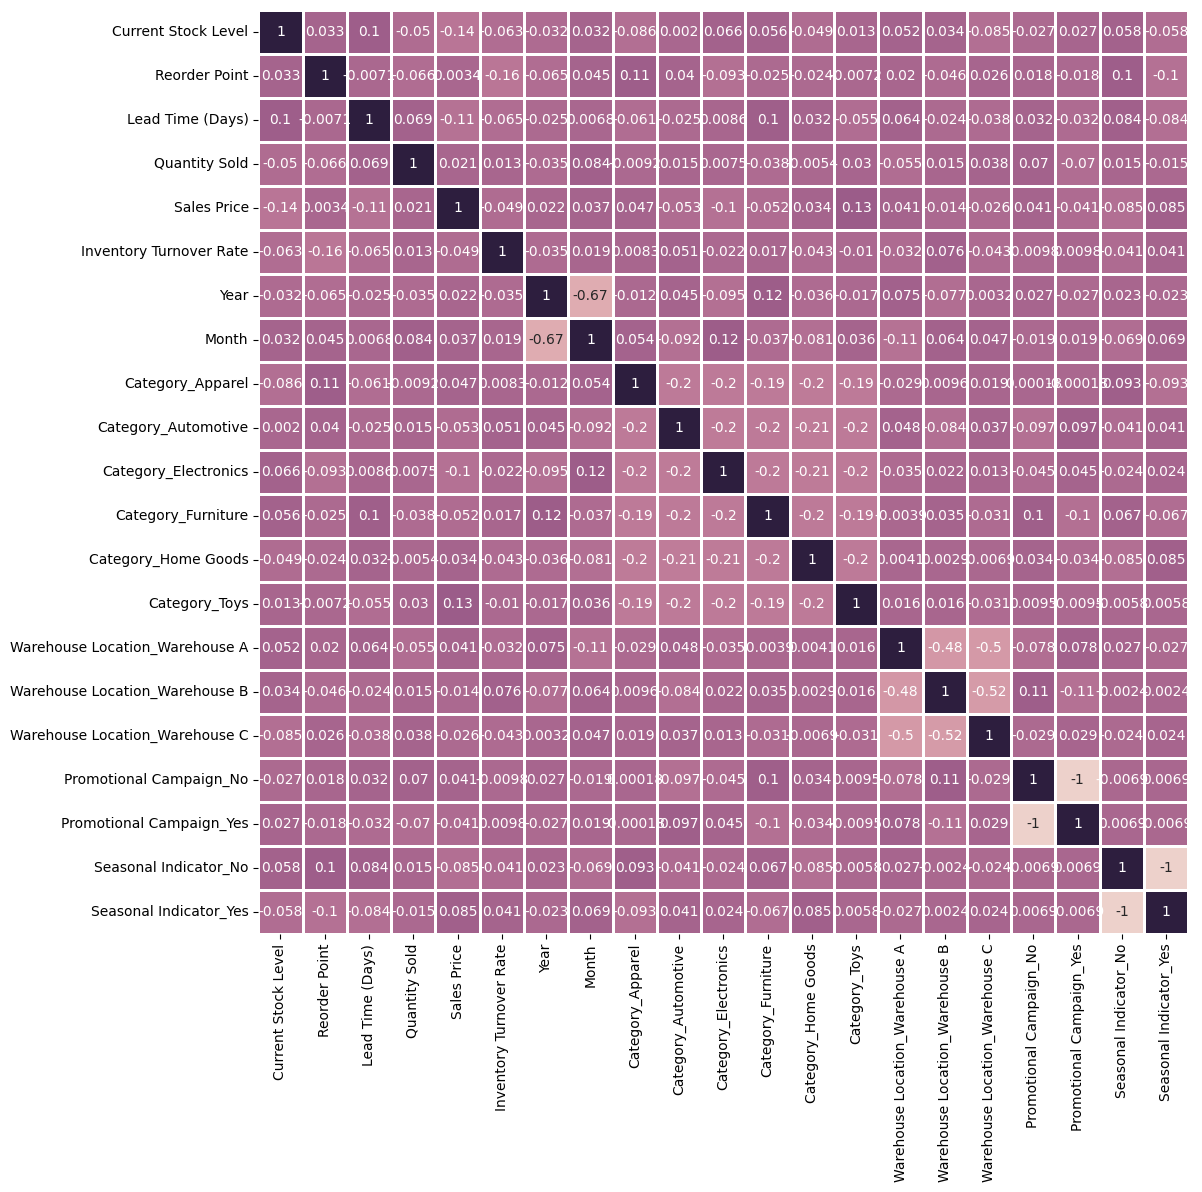

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
df = pd.read_csv('supply_chain_300_records.csv')
#data = df.loc[:, df.columns !='product_wg_ton']
#correlations = data.corrwith(df['product_wg_ton']).round(3).sort_values(ascending=True)

# Feature engineering: convert 'Sales Date' to a numerical format (year, month)
df['Sales Date'] = pd.to_datetime(df['Sales Date'])
df['Year'] = df['Sales Date'].dt.year
df['Month'] = df['Sales Date'].dt.month

# Drop columns not useful for prediction
df = df.drop(['Product Name', 'Sales Date', 'Customer ID', 'Supplier ID', 'Product ID'], axis=1)

# Convert categorical data to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Category', 'Warehouse Location', 'Promotional Campaign', 'Seasonal Indicator'])

# Features (X) and Target (y)
X = df.drop('Quantity Sold', axis=1)
y = df['Quantity Sold']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(12, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=1, cbar=False)
plt.show()


In [ ]:
data = df.loc[:, df.columns !='Quantity Sold']
correlations = data.corrwith(df['Quantity Sold']).round(3).sort_values(ascending=True)
correlations

,0
Promotional Campaign_Yes,-0.070
Reorder Point,-0.066
Warehouse Location_Warehouse A,-0.055
Current Stock Level,-0.050
Category_Furniture,-0.038
Year,-0.035
Seasonal Indicator_Yes,-0.015
Category_Apparel,-0.009
Category_Home Goods,-0.005
Category_Electronics,0.007


In [ ]:
import pandas as pd

df_test = pd.read_csv('supply_chain_300_records.csv')

# Feature engineering: convert 'Sales Date' to a numerical format (year, month)
df_test['Sales Date'] = pd.to_datetime(df_test['Sales Date'])
df_test['Year'] = df_test['Sales Date'].dt.year
df_test['Month'] = df_test['Sales Date'].dt.month

# Drop columns not useful for prediction
df_test = df_test.drop(['Product Name', 'Sales Date', 'Customer ID', 'Supplier ID', 'Product ID'], axis=1)

# Convert categorical data to numerical using one-hot encoding (same as for training data)
df_test = pd.get_dummies(df_test, columns=['Category', 'Warehouse Location', 'Promotional Campaign', 'Seasonal Indicator'])

# Get the target variable for the test set before dropping/reindexing
Y_test = df_test['Quantity Sold']

# Align columns between training and testing sets (handle potential missing columns)
X_train_cols = X_train.columns  # Assuming X_train is from previous code

# Drop the target variable from df_test to create X_test
X_test = df_test.drop('Quantity Sold', axis=1)

# Reindex X_test to match the training data columns and fill missing columns with 0
X_test = X_test.reindex(columns=X_train_cols, fill_value=0)

# The following lines are likely incorrect, they overwrite your original training data
# with the full dataset. Commenting these lines out.
# X_train = df.drop('Quantity Sold', axis=1, errors='ignore')
# Y_train = df['Quantity Sold']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
LRmodel = LinearRegression()

# Fit model to the training data

LRmodel.fit(X_train, Y_train)

# Fit model to the training data

LR_predicted = LRmodel.predict(X_test)

# Evaluate  the model

# r2 score
lr_r2 = round(r2_score(Y_test, LR_predicted), 3) # Changed: Use round() function correctly
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = round(np.sqrt(mean_squared_error(Y_test, LR_predicted)), 3)  # Changed: Use round() function correctly
print('Root Mean Squared Error:  ', lr_rmse)

# mean absolute error (MAE)
lr_mae = round(mean_absolute_error(Y_test, LR_predicted), 3)  # Changed: Use round() function correctly
print('Mean Absolute Error:  ', lr_mae)




R2 score:   0.033
Root Mean Squared Error:   13.747
Mean Absolute Error:   11.679


In [ ]:
RFmodel = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0)

# Fit model to the training data

RFmodel.fit(X_train, Y_train)

RF_predicted = RFmodel.predict(X_test)

# Evaluate  the model

# r2 score
rf_r2 = round(r2_score(Y_test, RF_predicted), 3)  # Use round() function correctly
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = round(np.sqrt(mean_squared_error(Y_test, RF_predicted)), 3)  # Use round() function correctly
print('Root Mean Squared Error:  ', rf_rmse)

# mean absolute error (MAE)
rf_mae = round(mean_absolute_error(Y_test, RF_predicted), 3)  # Use round() function correctly
print('Mean Absolute Error:  ', rf_mae)



R2 score:   0.294
Root Mean Squared Error:   11.745
Mean Absolute Error:   9.955


In [ ]:
GBmodel = GradientBoostingRegressor()

# Fit model to the training data

GBmodel.fit(X_train,Y_train)

GB_predicted = GBmodel.predict(X_test)

# Evaluate  the model

# r2 score
gb_r2 = round(r2_score(Y_test, GB_predicted), 3) # Corrected the round function call
print('R2 score:  ', gb_r2)

# root mean squared error (RMSE)
gb_rmse = round(np.sqrt(mean_squared_error(Y_test, GB_predicted)), 3) # Corrected the round function call
print('Root Mean Squared Error:  ', gb_rmse)

# mean absolute error (MAE)
gb_mae = round(mean_absolute_error(Y_test, GB_predicted), 3) # Corrected the round function call
print('Mean Absolute Error:  ', gb_mae)



R2 score:   0.731
Root Mean Squared Error:   7.256
Mean Absolute Error:   5.994


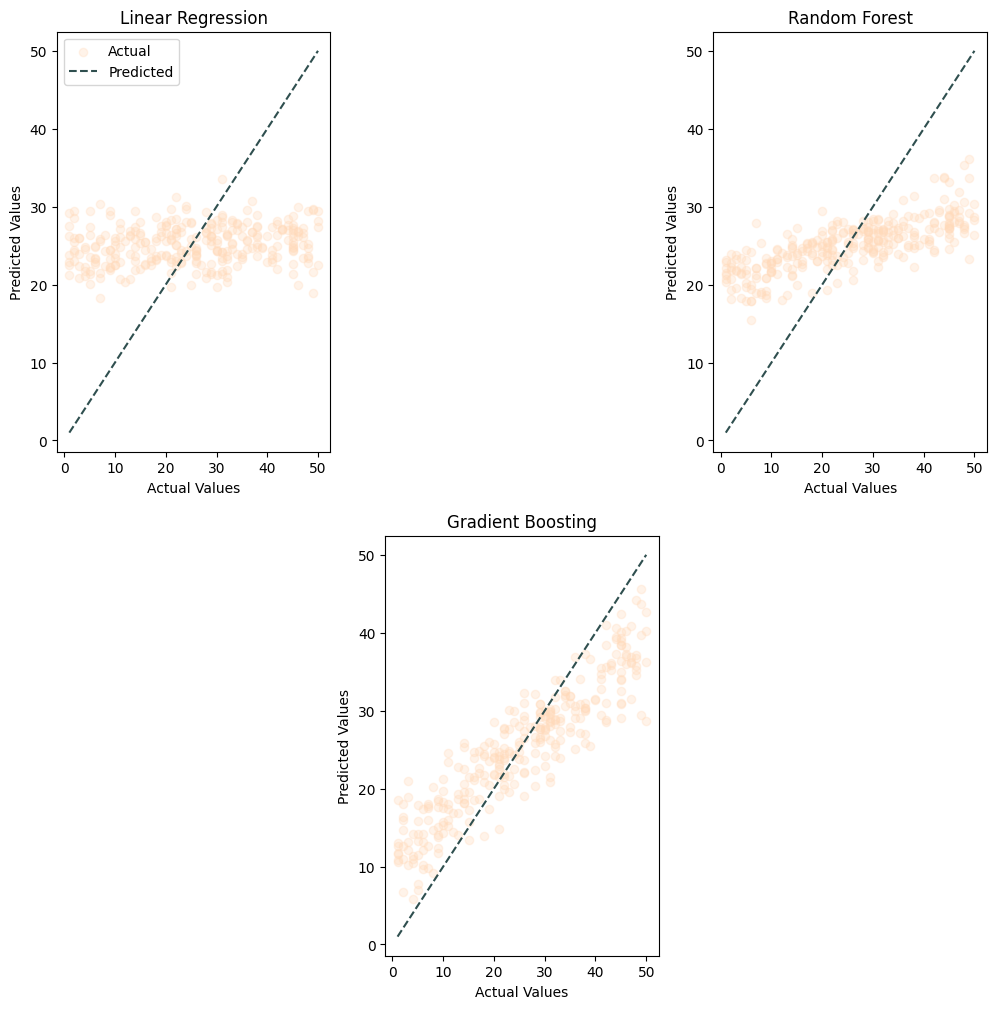

In [ ]:
plt.figure(figsize=(12, 12))


# linear regression

ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.scatter(Y_test, LR_predicted, color='#ffdab9', alpha=0.3, label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()


# random forest

ax1 = plt.subplot2grid((2, 3), (0, 2))
plt.scatter(Y_test, RF_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


# gb

ax1 = plt.subplot2grid((2, 3), (1, 1))
plt.scatter(Y_test, GB_predicted, color='#ffdab9', alpha=0.3)  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--',color='#2f4f4f')
plt.title('Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()


In [ ]:
Metrics = pd.DataFrame({'Model':('Linear Regression', 'Random Forest', 'Gradient Boosting'),
                       'R2 Score': (lr_r2, rf_r2, gb_r2),
                       'Root Mean Squared Error': (lr_rmse, rf_rmse, gb_rmse),
                       'Mean Absolute Error': (lr_mae, rf_mae, gb_mae),
                      })
Metrics

,Model,R2 Score,Root Mean Squared Error,Mean Absolute Error
0,Linear Regression,0.033,13.747,11.679
1,Random Forest,0.294,11.745,9.955
2,Gradient Boosting,0.731,7.256,5.994
